- **Purpose:** QC and preprocessing of scATAC-seq data using 10x Genomics 10K PBMC dataset downloaded from the manufacturer's website.
- **Date:** September 15, 2025

# Step 1
Load libraries and read data

In [1]:
# Load libraries
library(tidyverse)
library(ArchR)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /            

In [2]:
# Setting a seed for reproducibility
set.seed(2025)

In [3]:
# Adding ArchR genome and threads
addArchRGenome("hg38")
addArchRThreads(threads = 8)

Setting default genome to Hg38.

Setting default number of Parallel threads to 8.



In [4]:
# Input files
input_files <- c("fragment_scatac_pbmc10k/10k_pbmc_ATACv2_nextgem_Chromium_X_fragments.tsv.gz")
names(input_files) <- "pbmc10k"

In [5]:
# Create arrow files
arrow_file <- createArrowFiles(inputFiles = input_files)

Using GeneAnnotation set by addArchRGenome(Hg38)!

Using GeneAnnotation set by addArchRGenome(Hg38)!

ArchR logging to : ArchRLogs/ArchR-createArrows-24b289781f2-Date-2025-09-15_Time-02-06-08.491246.log
If there is an issue, please report to github with logFile!

Cleaning Temporary Files

2025-09-15 02:06:09.140089 : Batch Execution w/ safelapply!, 0 mins elapsed.

(pbmc10k : 1 of 1) Determining Arrow Method to use!

2025-09-15 02:06:09.244256 : (pbmc10k : 1 of 1) Reading In Fragments from inputFiles (readMethod = tabix), 0.002 mins elapsed.

2025-09-15 02:06:09.254939 : (pbmc10k : 1 of 1) Tabix Bed To Temporary File, 0.002 mins elapsed.

2025-09-15 02:08:54.127211 : (pbmc10k : 1 of 1) Successful creation of Temporary File, 2.75 mins elapsed.

2025-09-15 02:08:54.134344 : (pbmc10k : 1 of 1) Creating ArrowFile From Temporary File, 2.75 mins elapsed.

2025-09-15 02:10:14.41085 : (pbmc10k : 1 of 1) Successful creation of Arrow File, 4.088 mins elapsed.

2025-09-15 02:10:59.448259 : Contin

In [6]:
# Look at the created arrow file
arrow_file 

[1] "pbmc10k.arrow"

# Step 2
Add doublet score

In [ ]:
archr_proj1 <- addDoubletScores(
    input = arrow_file,
    k = 10,
    knnMethod = "UMAP",
    LSIMethod = 1
)

# Step 3
Create ArchR project

In [13]:
# First ArchR project creation
archr_proj1 <- ArchRProject(
    ArrowFiles = arrow_file,
    outputDirectory = "BloodTuotiral",
    copyArrows = TRUE
)
archr_proj1

Using GeneAnnotation set by addArchRGenome(Hg38)!

Using GeneAnnotation set by addArchRGenome(Hg38)!

Validating Arrows...

Getting SampleNames...

1 


Copying ArrowFiles to Ouptut Directory! If you want to save disk space set copyArrows = FALSE

1 


Getting Cell Metadata...

1 


Merging Cell Metadata...

Initializing ArchRProject...


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--'

class: ArchRProject 
outputDirectory: /nexus/posix0/MPI-psych/g/dept-binder/mpsmgp/ahsant/tutorials/BloodTuotiral 
samples(1): pbmc10k
sampleColData names(1): ArrowFiles
cellColData names(15): Sample TSSEnrichment ... DoubletEnrichment
  BlacklistRatio
numberOfCells(1): 10316
medianTSS(1): 17.435
medianFrags(1): 19949

In [15]:
# Look at the in-memory size of the object
paste0("Size of the object = ", round(object.size(archr_proj1) / 10^6, 3), "MB")

[1] "Size of the object = 60.112MB"

In [16]:
# Look at the matrices
getAvailableMatrices(archr_proj1)

[1] "GeneScoreMatrix" "TileMatrix"

In [18]:
# cellColData
head(archr_proj1@cellColData)

DataFrame with 6 rows and 15 columns
                            Sample TSSEnrichment ReadsInTSS ReadsInPromoter
                             <Rle>       <array>    <array>         <array>
pbmc10k#GAATCTGAGATGGGAA-1 pbmc10k         11.22      17281           17025
pbmc10k#GGGAACACAATACTGC-1 pbmc10k         5.272       5578            7275
pbmc10k#GGAGGATAGGCGTAGT-1 pbmc10k        12.952      31102           30978
pbmc10k#TAATCGGTCCCAGCGA-1 pbmc10k        15.146      46541           44467
pbmc10k#AGCCTCTCAAGTTGCT-1 pbmc10k        17.086      48992           45549
pbmc10k#CCAGAATAGGATTGAT-1 pbmc10k         4.294       4322            6063
                           ReadsInBlacklist      PromoterRatio  PassQC
                                    <array>            <array> <array>
pbmc10k#GAATCTGAGATGGGAA-1             1509 0.0867622027661982       1
pbmc10k#GGGAACACAATACTGC-1             1522 0.0374143712328485       1
pbmc10k#GGAGGATAGGCGTAGT-1             1125  0.177777012602438       1


In [19]:
# Look at the column names of the cellColData
colnames(archr_proj1@cellColData)

[1] "Sample"            "TSSEnrichment"     "ReadsInTSS"       
 [4] "ReadsInPromoter"   "ReadsInBlacklist"  "PromoterRatio"    
 [7] "PassQC"            "NucleosomeRatio"   "nMultiFrags"      
[10] "nMonoFrags"        "nFrags"            "nDiFrags"         
[13] "DoubletScore"      "DoubletEnrichment" "BlacklistRatio"

In [20]:
# Look at the number of cells passing qc
table(archr_proj1@cellColData$PassQC)


    1 
10316 

In [21]:
# Look at the sampleColData
archr_proj1@sampleColData

DataFrame with 1 row and 1 column
                    ArrowFiles
                   <character>
pbmc10k /nexus/posix0/MPI-ps..

In [24]:
# Look at the cellNames
head(archr_proj1$cellNames)

[1] "pbmc10k#GAATCTGAGATGGGAA-1" "pbmc10k#GGGAACACAATACTGC-1"
[3] "pbmc10k#GGAGGATAGGCGTAGT-1" "pbmc10k#TAATCGGTCCCAGCGA-1"
[5] "pbmc10k#AGCCTCTCAAGTTGCT-1" "pbmc10k#CCAGAATAGGATTGAT-1"

In [25]:
# Extract QC information 
df_qc <- getCellColData(
    archr_proj1,
    select = c("log10(nFrags)", "TSSEnrichment")
)
head(df_qc)

DataFrame with 6 rows and 2 columns
                           log10(nFrags) TSSEnrichment
                               <numeric>     <numeric>
pbmc10k#GAATCTGAGATGGGAA-1       4.99173        11.220
pbmc10k#GGGAACACAATACTGC-1       4.98776         5.272
pbmc10k#GGAGGATAGGCGTAGT-1       4.94015        12.952
pbmc10k#TAATCGGTCCCAGCGA-1       4.91247        15.146
pbmc10k#AGCCTCTCAAGTTGCT-1       4.86882        17.086
pbmc10k#CCAGAATAGGATTGAT-1       4.84943         4.294

# Step 4
Detailed visualization of QC metrics

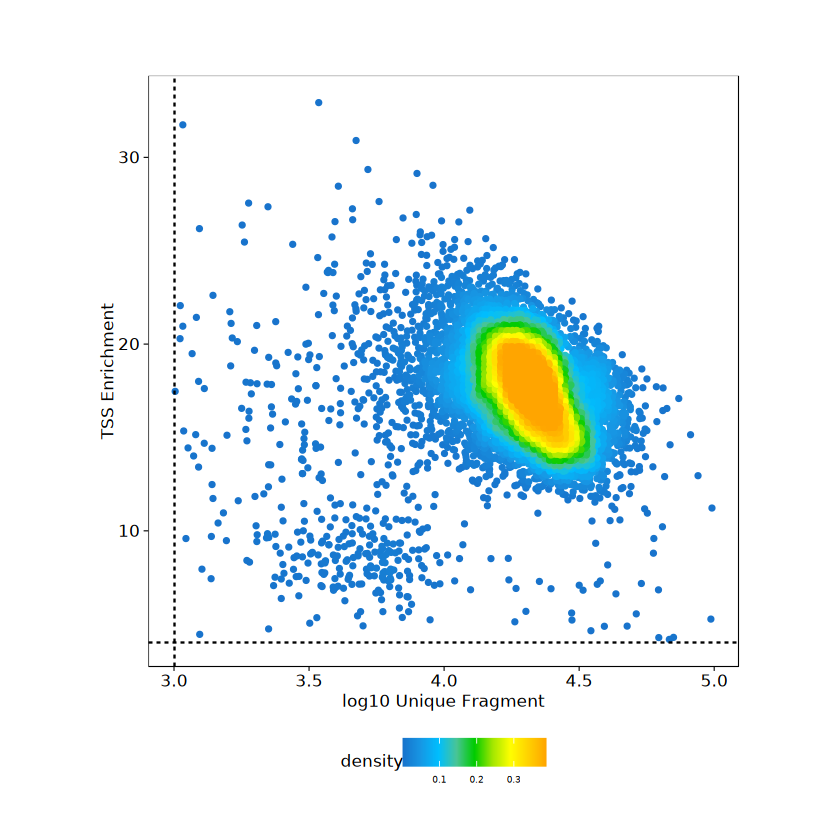

In [28]:
# Plot the QC data
ggPoint(
    x = df_qc[,1],
    y = df_qc[,2],
    colorDensity = TRUE,
    continuousSet = "sambaNight",
    xlabel = "log10 Unique Fragment",
    ylabel = "TSS Enrichment",
) +
geom_hline(yintercept = 4, lty = "dashed") +
geom_vline(xintercept = 3, lty = "dashed")

1 


Picking joint bandwidth of 0.537



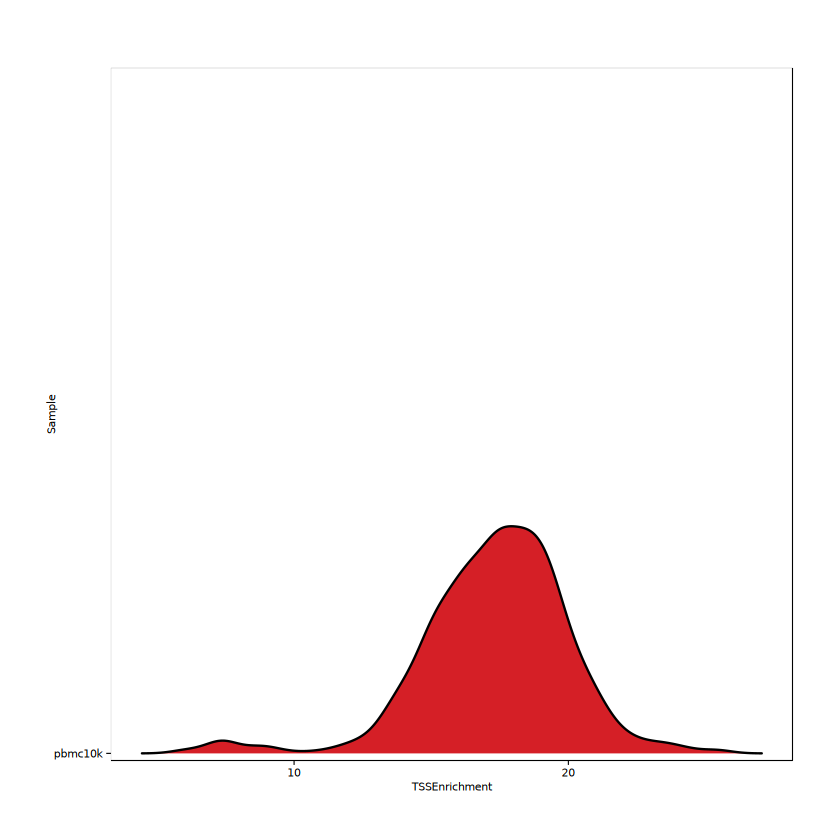

In [29]:
# Ridgeplot - TSS
plotGroups(
    ArchRProj = archr_proj1,
    groupBy = "Sample",
    colorBy = "cellColData",
    name = "TSSEnrichment",
    plotAs = "ridges"
)

1 




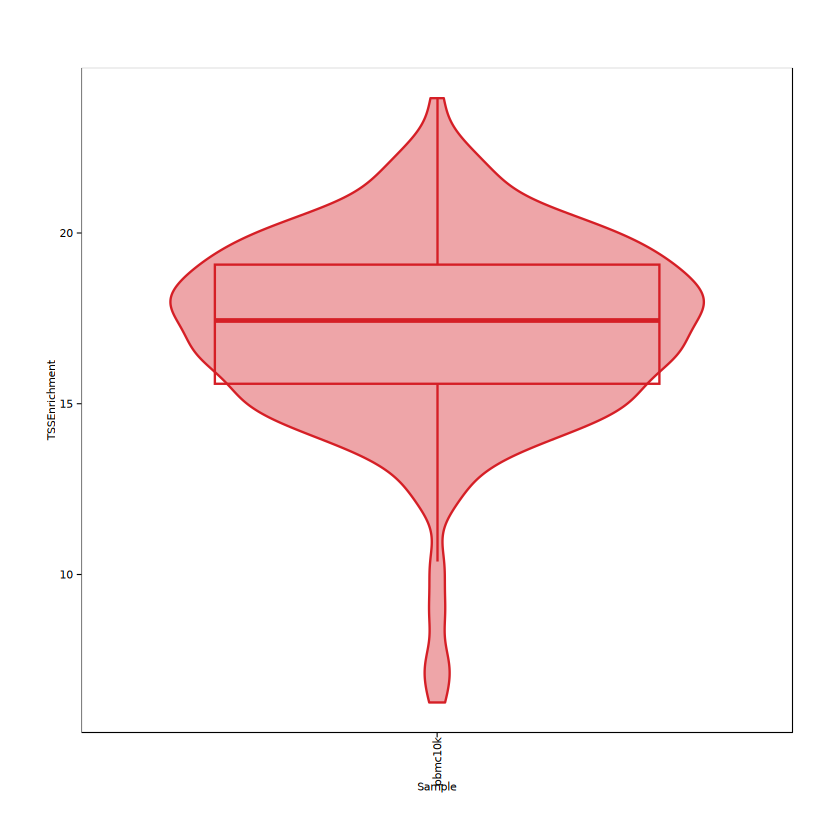

In [30]:
# violinplot - TSS
plotGroups(
    ArchRProj = archr_proj1,
    groupBy = "Sample",
    colorBy = "cellColData",
    name = "TSSEnrichment",
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
)

1 


Picking joint bandwidth of 0.0322



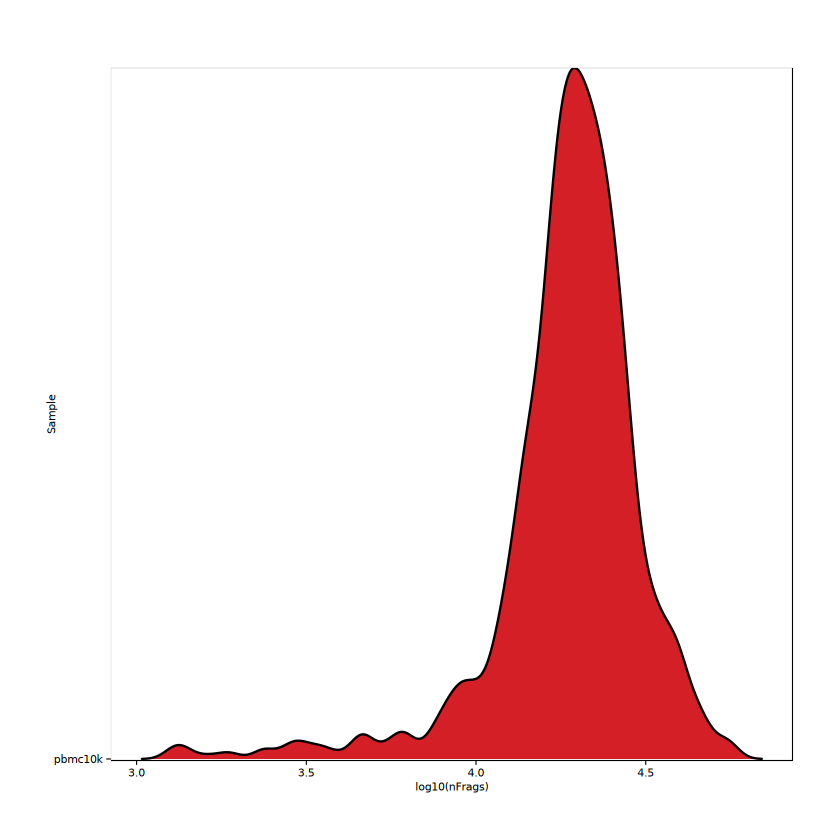

In [31]:
# Ridgeplot - log10 unique fragment
plotGroups(
    ArchRProj = archr_proj1,
    groupBy = "Sample",
    colorBy = "cellColData",
    name = "log10(nFrags)",
    plotAs = "ridges"
)

1 




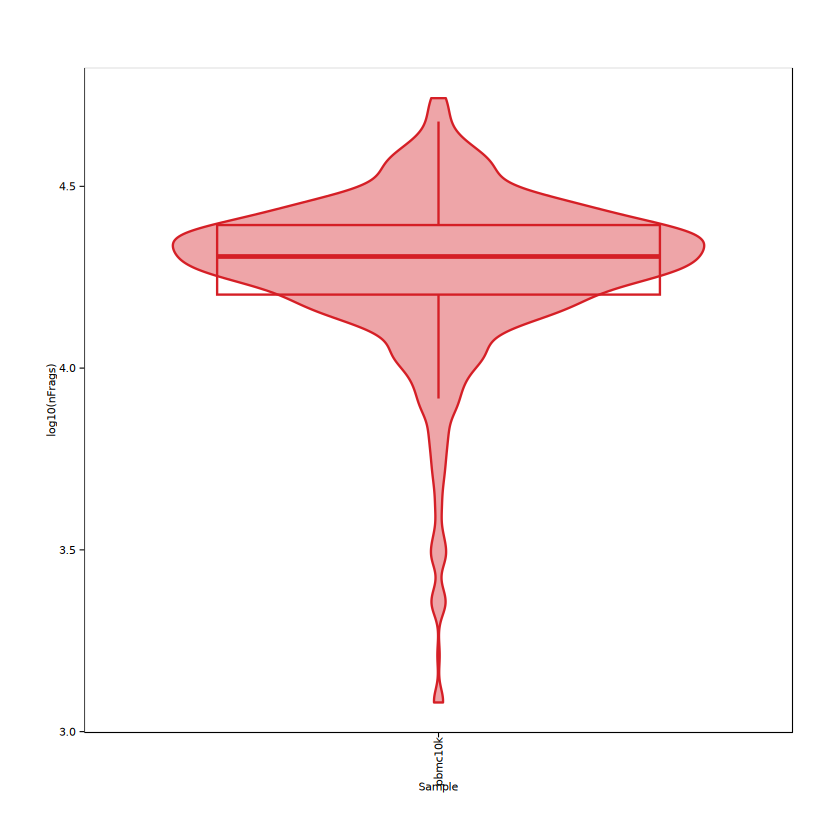

In [32]:
# violinplot - log10 Unique Fragment 
plotGroups(
    ArchRProj = archr_proj1,
    groupBy = "Sample",
    colorBy = "cellColData",
    name = "log10(nFrags)",
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
)

ArchR logging to : ArchRLogs/ArchR-plotTSSEnrichment-24b26133b771-Date-2025-09-15_Time-03-09-56.046087.log
If there is an issue, please report to github with logFile!

2025-09-15 03:09:57.690471 : pbmc10k Computing TSS (1 of 1)!, 0.027 mins elapsed.

2025-09-15 03:12:32.944982 : pbmc10k Finished Computing TSS (1 of 1)!, 2.615 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotTSSEnrichment-24b26133b771-Date-2025-09-15_Time-03-09-56.046087.log



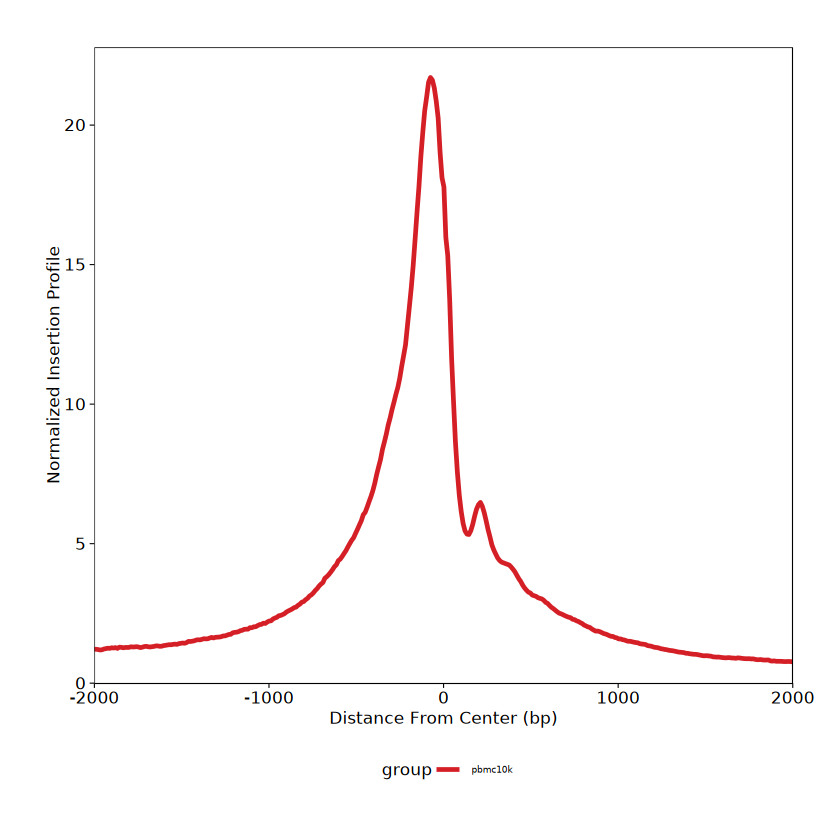

In [33]:
# TSS enrichment profile
plotTSSEnrichment(ArchRProj = archr_proj1)

ArchR logging to : ArchRLogs/ArchR-plotFragmentSizes-24b2759fc029-Date-2025-09-15_Time-03-12-33.18156.log
If there is an issue, please report to github with logFile!

2025-09-15 03:12:33.876091 : pbmc10k Computing FragmentSizes (1 of 1)!, 0.012 mins elapsed.

2025-09-15 03:13:28.071005 : pbmc10k Finished Computing FragmentSizes (1 of 1)!, 0.915 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotFragmentSizes-24b2759fc029-Date-2025-09-15_Time-03-12-33.18156.log



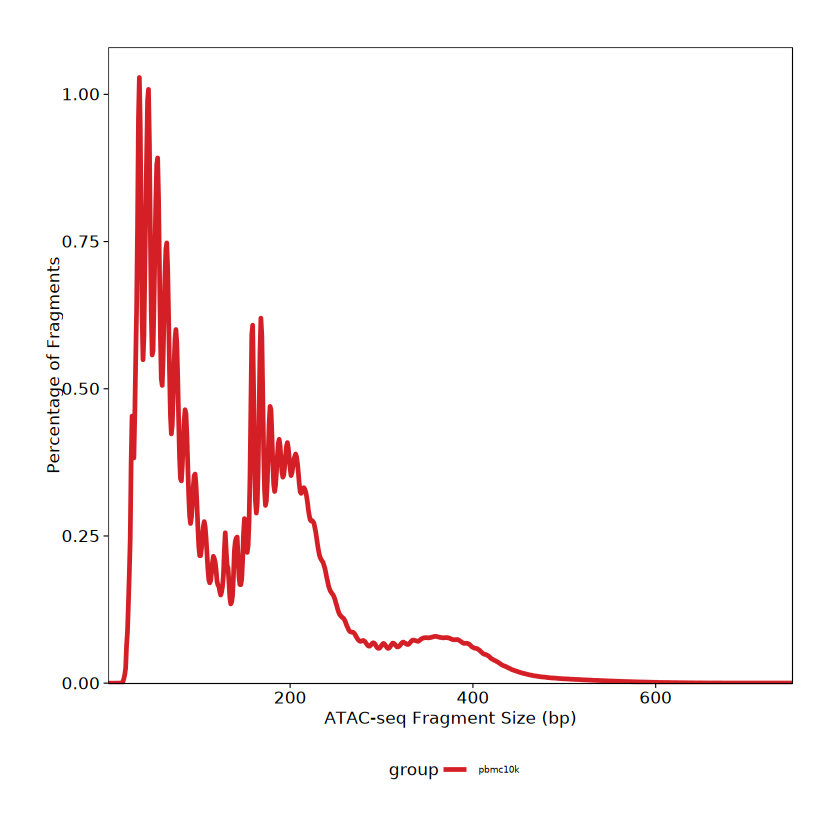

In [34]:
# Fragment size distributions
plotFragmentSizes(ArchRProj = archr_proj1)

# Step 5
Filter out doublets and low quality cells

In [35]:
# Filter out doublets
print(paste0("The number of cells before filtering = ", length(getCellNames(archr_proj1))))
archr_proj1 <- filterDoublets(archr_proj1)
print(paste0("The number of cells after filtering = ", length(getCellNames(archr_proj1))))

[1] "The number of cells before filtering = 10316"


Filtering 1064 cells from ArchRProject!

	pbmc10k : 1064 of 10316 (10.3%)



[1] "The number of cells after filtering = 9252"


In [38]:
# See if all the cells passed QC
table(archr_proj1$PassQC)


   1 
9252 

# Step 6
Save the ArchRProject

In [40]:
saveArchRProject(archr_proj1)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

class: ArchRProject 
outputDirectory: /nexus/posix0/MPI-psych/g/dept-binder/mpsmgp/ahsant/tutorials/BloodTuotiral 
samples(1): pbmc10k
sampleColData names(1): ArrowFiles
cellColData names(15): Sample TSSEnrichment ... DoubletEnrichment
  BlacklistRatio
numberOfCells(1): 9252
medianTSS(1): 17.444
medianFrags(1): 19466

In [43]:
# Experimentally load ArchRProj to see if it was saved correctly 
loadArchRProject("/nexus/posix0/MPI-psych/g/dept-binder/mpsmgp/ahsant/tutorials/BloodTuotiral")

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

class: ArchRProject 
outputDirectory: /nexus/posix0/MPI-psych/g/dept-binder/mpsmgp/ahsant/tutorials/BloodTuotiral 
samples(1): pbmc10k
sampleColData names(1): ArrowFiles
cellColData names(15): Sample TSSEnrichment ... DoubletEnrichment
  BlacklistRatio
numberOfCells(1): 9252
medianTSS(1): 17.444
medianFrags(1): 19466

In [44]:
sessionInfo()

R version 4.4.3 (2025-02-28)
Platform: x86_64-conda-linux-gnu
Running under: SUSE Linux Enterprise Server 15 SP6

Matrix products: default
BLAS/LAPACK: /nexus/posix0/MPI-psych/g/dept-binder/mpsmgp/ahsant/software/miniforge3/envs/jupyter/lib/libopenblasp-r0.3.28.so;  LAPACK version 3.12.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ggridges_0.5.6                 